In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("LaqnData.csv")

In [3]:
df.drop(["Units","Site","Provisional or Ratified"], axis = 1, inplace = True)

In [4]:
df.head()

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3


In [5]:
pvt_df = df.pivot(index = "ReadingDateTime",
                  columns = "Species",
                  values= "Value"
                  )
pvt_df.head()

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


In [6]:
datetime_df = df.ReadingDateTime.str.split(" ", expand = True)
datetime_df.columns = ["Date","Time"]
datetime_df.head()

,Date,Time
0,01/01/2017,00:00
1,01/01/2017,01:00
2,01/01/2017,02:00
3,01/01/2017,03:00
4,01/01/2017,04:00


In [7]:
date_df = datetime_df.Date.str.split("/",expand = True)
date_df.columns = ["Day","Month","Year"]
date_df.head()

,Day,Month,Year
0,01,01,2017
1,01,01,2017
2,01,01,2017
3,01,01,2017
4,01,01,2017


In [8]:
df = df.join(date_df).join(datetime_df).drop(columns = ["ReadingDateTime","Year","Date"])

In [9]:
df.head()

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00


In [10]:
pvt_df = df.pivot(index = ["Day","Month","Time"],
                  columns = "Species",
                  values = "Value")

In [11]:
pvt_df.head()

Species           NO   NO2   NOX  PM10  PM2.5
Day Month Time                               
01  01    00:00  3.5  30.8  36.2  35.7    NaN
          01:00  3.6  31.5  37.0  28.5    NaN
          02:00  2.2  27.3  30.7  22.7    NaN
          03:00  2.1  23.5  26.8  20.5    NaN
          04:00  3.3  28.0  33.0  22.1    NaN

In [12]:
pvt_df.index

MultiIndex([('01', '01', '00:00'),
            ('01', '01', '01:00'),
            ('01', '01', '02:00'),
            ('01', '01', '03:00'),
            ('01', '01', '04:00'),
            ('01', '01', '05:00'),
            ('01', '01', '06:00'),
            ('01', '01', '07:00'),
            ('01', '01', '08:00'),
            ('01', '01', '09:00'),
            ...
            ('31', '12', '14:00'),
            ('31', '12', '15:00'),
            ('31', '12', '16:00'),
            ('31', '12', '17:00'),
            ('31', '12', '18:00'),
            ('31', '12', '19:00'),
            ('31', '12', '20:00'),
            ('31', '12', '21:00'),
            ('31', '12', '22:00'),
            ('31', '12', '23:00')],
           names=['Day', 'Month', 'Time'], length=8760)

In [13]:
grp_df = df.set_index(["Day","Month","Time", "Species"])
grp_df.index

MultiIndex([('01', '01', '00:00',    'NO'),
            ('01', '01', '01:00',    'NO'),
            ('01', '01', '02:00',    'NO'),
            ('01', '01', '03:00',    'NO'),
            ('01', '01', '04:00',    'NO'),
            ('01', '01', '05:00',    'NO'),
            ('01', '01', '06:00',    'NO'),
            ('01', '01', '07:00',    'NO'),
            ('01', '01', '08:00',    'NO'),
            ('01', '01', '09:00',    'NO'),
            ...
            ('31', '12', '14:00', 'PM2.5'),
            ('31', '12', '15:00', 'PM2.5'),
            ('31', '12', '16:00', 'PM2.5'),
            ('31', '12', '17:00', 'PM2.5'),
            ('31', '12', '18:00', 'PM2.5'),
            ('31', '12', '19:00', 'PM2.5'),
            ('31', '12', '20:00', 'PM2.5'),
            ('31', '12', '21:00', 'PM2.5'),
            ('31', '12', '22:00', 'PM2.5'),
            ('31', '12', '23:00', 'PM2.5')],
           names=['Day', 'Month', 'Time', 'Species'], length=43800)

In [14]:
grp_df

Value
Day Month Time  Species       
01  01    00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
31  12    19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

In [15]:
grp_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Day Month Time                               
01  01    00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
31  12    19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [16]:
grp_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Day Month Time                               
01  01    00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
31  12    19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

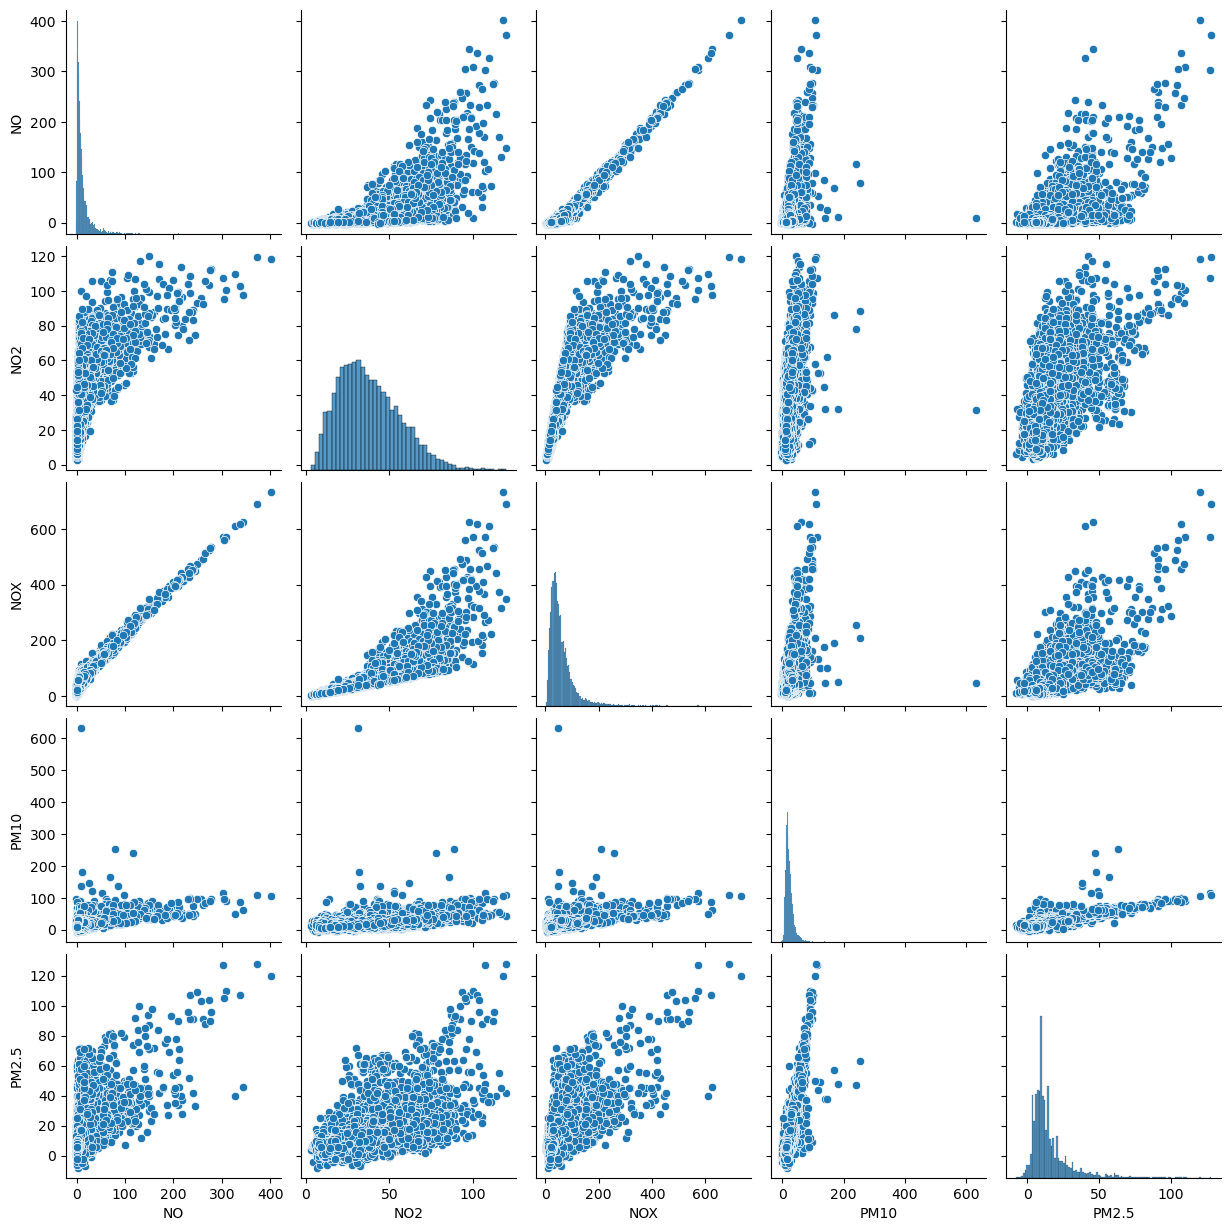

In [17]:
import seaborn as sns
sns.pairplot(pvt_df)